<a href="https://colab.research.google.com/github/vishnuiyer23ug-stack/computational-statistics-course-4/blob/main/Class_04_Introduction_to_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is *optimization*?
Optimization means finding the best choice among many possibilities. We encounter it in many aspects of our daily lives, such as: when we are tuning our recipe indegredients to make the food taste better, when we finding the best route to take to get to a place quickly.

Much of statistical learning deals with building models to make predictions. Optimization plays an important role here as well. In statistical learning, we optimize model settings so predictions are as close as possible to reality.

Let us take a simple example. Suppose we are predicting students' test scores based on the hours spent studying. If we assume that more study hours (h) implies better test scores (s), we can begin with a linear simple model:

$s=a+bh$

This is the equation of a straight line. Optimization in this context means adjusting a and b so the line fits the data best.

_But how do we know that a particular line fits the data best?_

Short answer - loss functions! Loss functions measure how bad our predictions are.

Good predictions->small loss

bad predictions->large loss.

So if want the model that _best_ fits the data, we need to minimize the loss.

Let us take a simple loss function and understand how to minimize the loss.

$loss = x^2$

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Create a function called loss_func that takes in as input some value and returns its square
def loss_func(n):
  return n**2
loss_func(48)

2304

Now let us plot this curve to visualize the loss function

Text(0.5, 1.0, 'y = x^2')

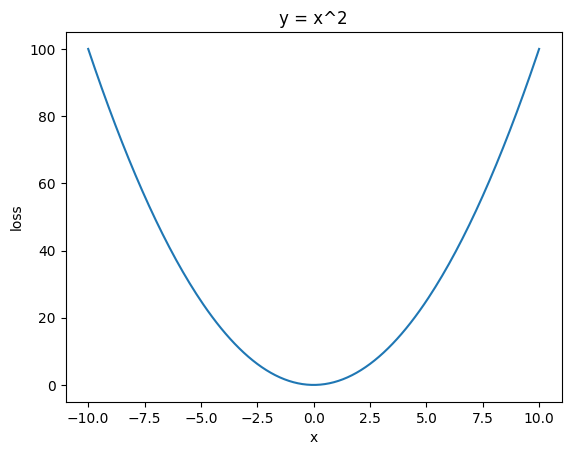

In [60]:
# Create 2 arrays of x_values and the corresponding y_values and plot the curve
x_values = np.arange(-10, 10.1,0.1)
y_values = loss_func(x_values)

fig, ax = plt.subplots()
ax.plot(x_values,y_values)
ax.set_xlabel("x")
ax.set_ylabel("loss")
ax.set_title("y = x^2")

This curve has a single minimum value which occurs at x=0. Such functions which have a single global minimum are referred to as convex functions. When multiple minima exist, things get more difficult!

Now let's try walking down this gradient. The strategy is pretty simple.
1. Start with a guess
2. Look at slope (aka gradient) at that point
3. Take a small step in the downhill direction
4. Repeat steps 1-3 until you reach the base of the valley.

Let us try visualizing the walk

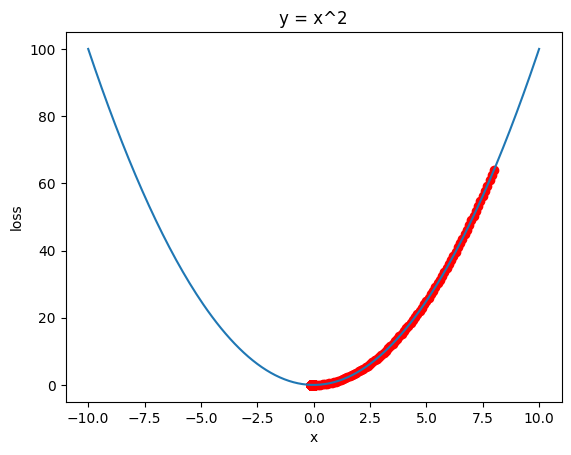

In [61]:

x = 8 # starting point
alpha = 0.1 # size of each step
steps = [x]

for i in range (1000):
  slope = 2*x
  if slope > 0:
    x = x - alpha
  elif slope < 0:
    x = x + alpha
  else:
    break
  steps.append(x)

# plotting the curve first with the same code as before

fig, ax = plt.subplots()
ax.plot(x_values,y_values)
ax.set_xlabel("x")
ax.set_ylabel("loss")
ax.set_title("y = x^2")

plt.scatter(steps, loss_func(np.array(steps)), color = "red")

# The problem with the fixed step sizes is that you could completely miss the minima. Try taking a step size of 5 here and see what happens
# If we take really small steps we need a lot of steps to reach the minima, which is also a bit inefficient (try alpha = 0.001)

In [62]:
# Now, instead of taking constant steps, let us take larger steps when the slope is steeper and see the difference

# Starting point
x = 8

# How big each step is
learning_rate = 0.1

# Store steps for plotting
steps = [x]
# Create a loop for the repetition step and move downhill in each step
for i in range (100):
  slope = 2*x
  x = x - slope*learning_rate # This helps us take bigger steps the greater the slope is
  steps.append(x)


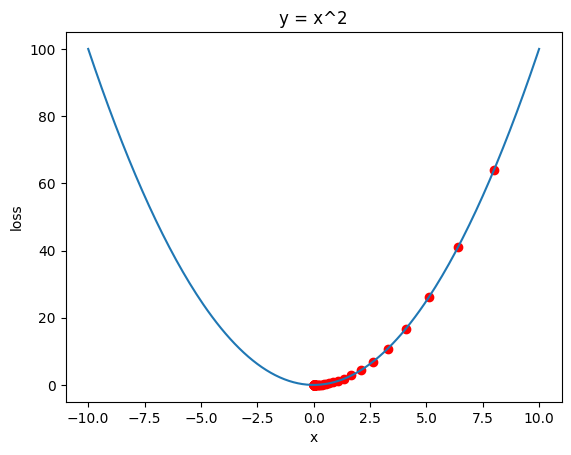

In [63]:
# Plot the curve and the steps that you took to reach the minimum

# plotting the curve first with the same code as before

fig, ax = plt.subplots()
ax.plot(x_values,y_values)
ax.set_xlabel("x")
ax.set_ylabel("loss")
ax.set_title("y = x^2")

plt.scatter(steps, loss_func(np.array(steps)), color = "red")

### Homework
1. Draw a curve with multiple minima. Why do you think it would be difficult to get to the absolute minimum (aka global minimum) in this case?
2. Can you write a simple mathematical equation that has multiple minima?

In [64]:
def multiple_minima(n):
  return n**4 - 10*(n**2) + 5*n # This curve will have multiple minima (2 to be precise). It is non-convex

Text(0.5, 1.0, 'y = x^4 - 10x^2 + 5x')

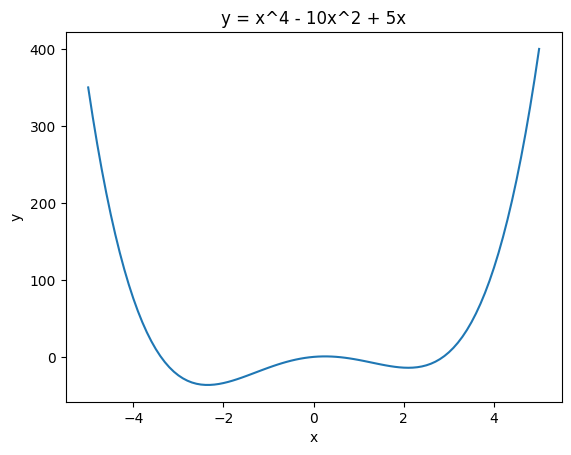

In [65]:
x_values = np.arange(-5,5.1,0.1)
y_values = multiple_minima(x_values)

fig, ax = plt.subplots()
ax.plot(x_values,y_values)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = x^4 - 10x^2 + 5x")

# Non-convex functions are annoying because gradient descent does not allow us to arrive at the global minima every time.
# We will be able to reach the local minima but we could get stuck and never reach the global minimum

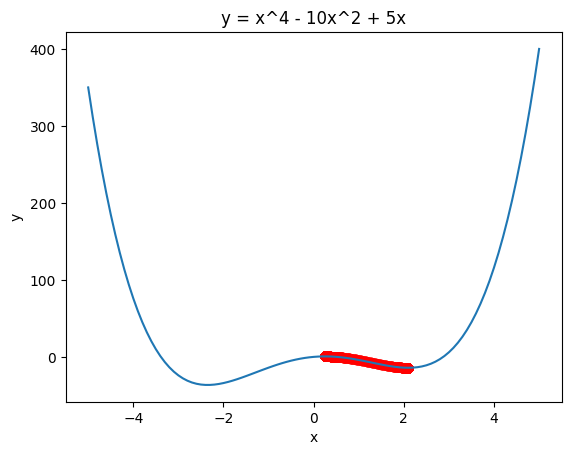

In [111]:
# Now we can try doing a gradient descent for the plot above

x = 0.25325
steps = [x]
learning_rate = 0.001

for i in range (10000):
  slope = 4*(x**3) - 20*x + 5
  x = x - slope*learning_rate
  steps.append(x)

# Plotting the curve and the steps
fig, ax = plt.subplots()
ax.plot(x_values,y_values)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = x^4 - 10x^2 + 5x")

plt.scatter(steps, multiple_minima(np.array(steps)), color = "red")

# Based on the combinations of the learning rate and the initial position, we can either end at the local minima or jump over and reach
# the global minima. Keep trying to change the parameters and see how things are changing.
# Try changing x = 0.25325 to x = 0.25324
# This is a cubic polynomial, which means that it has three roots. However, there is still only two minima. This is because when we take
# the second derivative and substitute values of all the roots, only two of them give a result greater than 0 (i.e., minima). The third root
# ends up giving a second derivative which is less than zero (i.e., a maxima)

Text(0.5, 1.0, 'y = sin(x)')

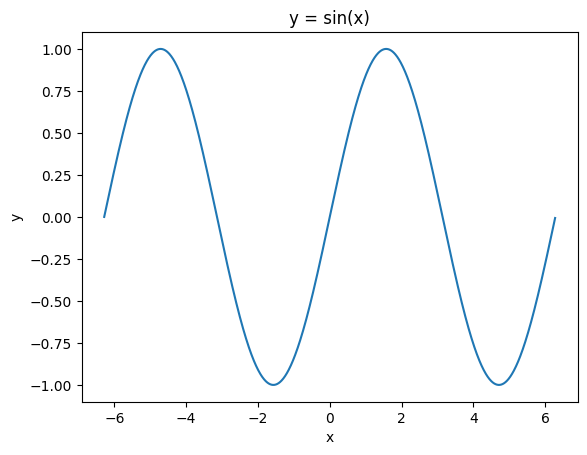

In [81]:
# A simple mathematical equation with multiple minima
x = np.arange(-2*np.pi, 2*np.pi, 0.01)

y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = sin(x)")